# DS-SF-27 | Unit Project 1: Research Design Write-Up

In this first unit project you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer: Paying customer indicator (Yes or no)

> ### Question 2.  What are the predictors/covariates?

Answer: age, gender, location, profession, days since last login, activity score 1 = active user, 0 = inactive user)

> ### Question 3.  What timeframe is this data relevent for?

Answer: January - April 2015

> ### Question 4.  What is the hypothesis?

Answer: Signup and customer useage data will allow us to predict if a free-tier customer will turn into a paying customer.

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [1]:
import os
import pandas as pd

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [9]:
df.prestige.unique()

array([  3.,   1.,   4.,   2.,  nan])

> ### Question 5.  Create a data dictionary.

Answer: (Use the template below)

Variable | Description | Type of Variable
---|---|---
Var 1 | 0 = Not thing, 1 = Thing | Categorical
Var 2 | Thing in unit X | Continuous

Variable | Description | Type of Variable
---|---|---
admit | 0 = Not Admitted 1 = Admitted | Categorical
gre | Graduate Record Exam Scores (Integer w/ 1 decimal place) | Continuous
gpa | Grade Point Average (Integer w/ 2 decimal places) | Continuous
prestige | 1 = Low 2 = Average 3 = High  4 = Very High | Categorical


We would like to explore the association between X and Y.

In [10]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


In [26]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

> ### Question 6.  What is the outcome?

Answer: Admission status (Not Admitted or Admitted)

> ### Question 7.  What are the predictors/covariates?

Answer: gre, gpa, prestige

> ### Question 8.  What timeframe is this data relevent for?

Answer: The relevant timeframe is not clear, but my guess is that this data is relevant for the school year.

> ### Question 9.  What is the hypothesis?

Answer: Variables such as GRE (Graduate Record Exam scores), GPA (Grade Point Average) and the Prestige of the undergraduate school can help affect/help predict admission into the UCLA graduate school

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer: Examine how GRE, GPA scores and the prestige of the attended undergraduate school (1 = low, 2 = average, 3 = high, 4 = very high) can affect a student's chances of being admitted at UCLA.

or 

Determine which students will be admitted to UCLA, using the students' GRE (graduate record exam scores), GPA (Grade Point Average) and the Prestige of their undergraduate school(1 = low, 2 = average, 3 = high, 4 = very high)"

## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

Answer: To find an association between dependant variable (admit) and three predicators (gre, gpa, prestige).
To identify trends and outliers 
To help a student find out the gre, gpa, and prestige of the undergrad school that they need to have in order to increase their chances of attending UCLA


> ### Question 12.  What are the assumptions of the distribution of data?

Answer:
I assume that this is either a sample or the entire population of the student applicants 
I assume that can be a normal distribution.

> ### Question 13.  How will determine the distribution of your data?

Answer: Plot out the data (box plot, scatter plot...etc) to visually identify them
Calculate the IQR. If an observation falls more than 1.5 IQR above the upper quartile or 1.5 IQR below the lower quartile, then it's an outlier.

> ### Question 14.  How might outliers impact your analysis?

Answer: Outliers may not change the results but does affect assumptions
Outlier can also be due to incorrectly entered data, which may skew the analysis towards a direction.

> ### Question 15.  How will you test for outliers?

Answer: By plotting a box plot or a scatter plot to visually identify the outliers, or by calculating the IQR. Any observation that falls 1.5 IQR above the upper quartile, or 1.5 IQR below the lower quartile is considered an outlier. In the two graphs below, there's one outlier for 'gpa' and two outliers for 'gre'.

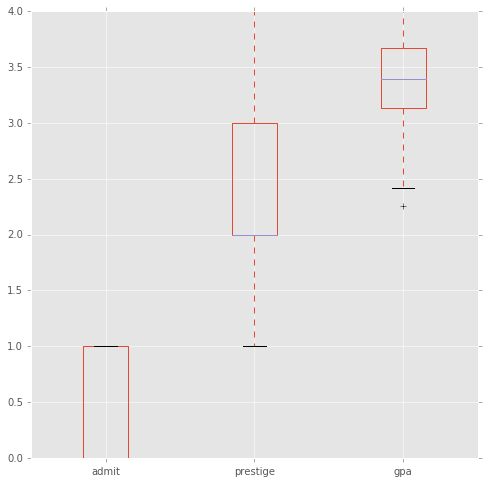

In [40]:
df[ ['admit', 'prestige', 'gpa'] ].plot(kind = 'box', figsize = (8, 8))

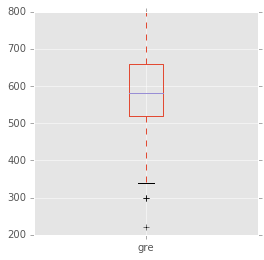

In [41]:
df[ ['gre'] ].plot(kind = 'box', figsize = (4, 4))

In [47]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 16.  What is colinearity?

Answer: It's a situation in which two or more variables in a multiple regression model are highly linearly related. 

> ### Question 17.  How will you test for covariance?

Answer:

In [48]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer: 

Problem Statement: 
Examine how GRE, GPA scores and the prestige of the attended undergraduate school (1 = low, 2 = average, 3 = high, 4 = very high) can affect a student's chances of being admitted at UCLA.

Hypothesis:
Variables such as GRE (Graduate Record Exam scores), GPA (Grade Point Average) and the Prestige of the undergraduate school can help affect/help predict admission into the UCLA graduate school

Steps: 
1. Understand, clean and prepare the data
      - Summarize the data (find min, max, median, std dev...etc)
      - Define variables and build a data dictionary
      - Detect and drop outliers if necessary

2. Find Assocation/Model Fit
      - Find association between admit (dependant variable) and gre, gpa, and prestige
      - Which of the variables is statistically significant?
      - Is there a statistically significant diffence by gre/gpa the different levels of prestige? 
      - With every unit of increase for gre, gpa, prestige - what are the chances of a student being admitted 

3. Plot Graphs
4. Summarize findings
      